<a href="https://colab.research.google.com/github/Nambi17-eng/Heart-Disease-Prediction-project-/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Disese Prediction

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('/cleaned_merged_heart_dataset (1).csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
1883,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
1884,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
1885,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
1886,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0
1887,53,1,0,110,335,0,1,143,1,3.0,1,1,3,0


By Find The Null Values In the Dataset

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exang,0
oldpeak,0


Checking The Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1888 non-null   int64  
 1   sex       1888 non-null   int64  
 2   cp        1888 non-null   int64  
 3   trestbps  1888 non-null   int64  
 4   chol      1888 non-null   int64  
 5   fbs       1888 non-null   int64  
 6   restecg   1888 non-null   int64  
 7   thalachh  1888 non-null   int64  
 8   exang     1888 non-null   int64  
 9   oldpeak   1888 non-null   float64
 10  slope     1888 non-null   int64  
 11  ca        1888 non-null   int64  
 12  thal      1888 non-null   int64  
 13  target    1888 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 206.6 KB


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

In [ ]:
df['target'].value_counts()

,count
target,
1,977
0,911


Train --> Other Columns From Target
Test  --> Only The Target column

In [ ]:
train = df.drop('target',axis=1)
test = df['target']

In [ ]:
print(train)
print(test)

      age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0      63    1   3       145   233    1        0       150      0      2.3   
1      37    1   2       130   250    0        1       187      0      3.5   
2      41    0   1       130   204    0        0       172      0      1.4   
3      56    1   1       120   236    0        1       178      0      0.8   
4      57    0   0       120   354    0        1       163      1      0.6   
...   ...  ...  ..       ...   ...  ...      ...       ...    ...      ...   
1883   60    1   0       140   207    0        0       138      1      1.9   
1884   46    1   0       140   311    0        1       120      1      1.8   
1885   59    1   3       134   204    0        1       162      0      0.8   
1886   54    1   1       154   232    0        0       164      0      0.0   
1887   53    1   0       110   335    0        1       143      1      3.0   

      slope  ca  thal  
0         0   0     1  
1         0   0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(train,test, test_size=0.2,stratify=test, random_state= 2)

By Checking The Data Set Of 20% in The Test Data Set

In [ ]:
print (train.shape,X_train.shape,X_test.shape)

(1888, 13) (1510, 13) (378, 13)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score ,r2_score

By Checking The Pressence of The Traget In The Train Data set Through the Visual

<Figure size 600x600 with 0 Axes>

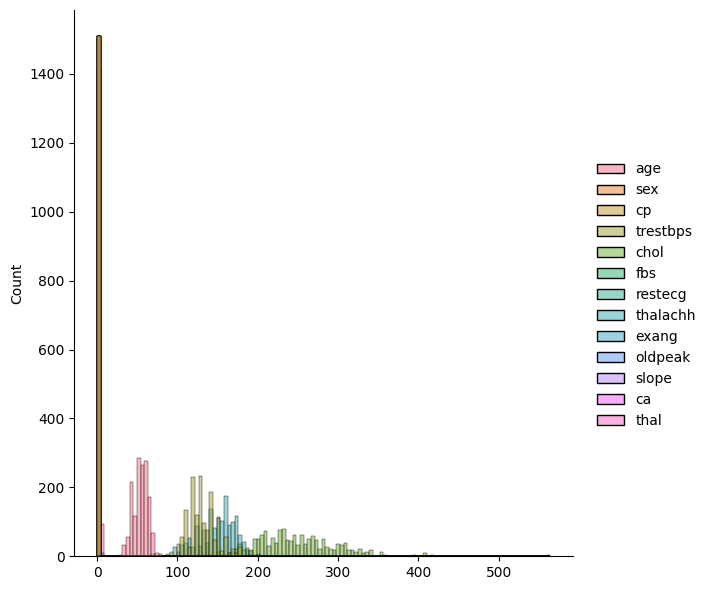

In [ ]:

plt.figure(figsize=(6,6))
sns.displot(X_train, height=6)
plt.show()

Assigning The Reggresion Model

In [ ]:
reg = LinearRegression()

Assigning The X_train And X_test Data Set

In [ ]:
reg.fit(X_train,Y_train)
model = reg.predict(X_train)
r2 = r2_score(Y_train, model)
print(r2)

0.3269336799711071


In [ ]:
reg.fit(X_test,Y_test)
model = reg.predict(X_test)
r2 = r2_score(Y_test, model)
print(r2)

0.2712162203093047


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)



clf = KNeighborsClassifier(n_neighbors =13)
scoring = 'accuracy'
score = cross_val_score(clf , train , test , cv = k_fold , n_jobs = 1 , scoring = scoring)
print(score)

[0.61904762 0.7037037  0.6031746  0.64550265 0.62962963 0.63492063
 0.65608466 0.60846561 0.60106383 0.71276596]


In [ ]:
round(np.mean(score)*100 ,2)

64.14

Viusulise The Prediction Data Set

In [ ]:
clf = SVC()
clf.fit(train, test)
prediction = clf.predict(X_train)
prediction

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
print(len(X_train),len(Y_train))

1510 1510


Predicting The Heart Desiase By Input

In [ ]:
input = (67,1,0,160,286,0,0,108,1,1.5,1,3,2)
input_arr = np.asarray(input)
reshaped_input = input_arr.reshape(1,-1)
prediction = clf.predict(reshaped_input)
disease_prediction = int(prediction)
print(disease_prediction)

0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-131-b36cc687880a>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  disease_prediction = int(prediction)
